# Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import features as ft
import re

# Data

In [6]:
# Path to the directory containing the data files
source_path = "D:/Popocatepetl/processed_data/2023"
paths = os.listdir(source_path)

In [7]:
# Filter files for a specific month
month = 'CN_PPPP_HHZ_2023_05'
with_s = [x for x in paths if re.match(r'^{}'.format(month), x)]
with_s.sort()
print(with_s)

['CN_PPPP_HHZ_2023_05_01.seed', 'CN_PPPP_HHZ_2023_05_02.seed', 'CN_PPPP_HHZ_2023_05_03.seed', 'CN_PPPP_HHZ_2023_05_04.seed', 'CN_PPPP_HHZ_2023_05_05.seed', 'CN_PPPP_HHZ_2023_05_06.seed', 'CN_PPPP_HHZ_2023_05_07.seed', 'CN_PPPP_HHZ_2023_05_08.seed', 'CN_PPPP_HHZ_2023_05_09.seed', 'CN_PPPP_HHZ_2023_05_10.seed', 'CN_PPPP_HHZ_2023_05_11.seed', 'CN_PPPP_HHZ_2023_05_12.seed', 'CN_PPPP_HHZ_2023_05_13.seed', 'CN_PPPP_HHZ_2023_05_14.seed', 'CN_PPPP_HHZ_2023_05_15.seed', 'CN_PPPP_HHZ_2023_05_16.seed', 'CN_PPPP_HHZ_2023_05_17.seed', 'CN_PPPP_HHZ_2023_05_18.seed', 'CN_PPPP_HHZ_2023_05_19.seed', 'CN_PPPP_HHZ_2023_05_20.seed', 'CN_PPPP_HHZ_2023_05_21.seed', 'CN_PPPP_HHZ_2023_05_22.seed', 'CN_PPPP_HHZ_2023_05_23.seed', 'CN_PPPP_HHZ_2023_05_24.seed', 'CN_PPPP_HHZ_2023_05_25.seed', 'CN_PPPP_HHZ_2023_05_26.seed', 'CN_PPPP_HHZ_2023_05_27.seed', 'CN_PPPP_HHZ_2023_05_28.seed', 'CN_PPPP_HHZ_2023_05_29.seed', 'CN_PPPP_HHZ_2023_05_30.seed', 'CN_PPPP_HHZ_2023_05_31.seed']


# Calculate features

In [9]:
# Test the features in the range of 0.7 to 30 Hz
min_freq = 0.7
max_freq = 30
# DataFrame to store all features
features_df = pd.DataFrame(columns=["timestamp", "energy", "kurtosis", "frecuency_index", "entropy"])
# Loop through each file and extract features
for file in with_s:
    print(file)
    [filtered_signal, s_low, s_high] = ft.load_and_preprocess_seismic_data(source_path+"/"+file, freqmin=min_freq, freqmax=max_freq, low_freqmin=1, low_freqmax=4, high_freqmin=4, high_freqmax=9)
    day_df = ft.calculate_features(filtered_signal[0], s_low[0], s_high[0], window_size_seconds=600, overlap=0.5)
    features_df = pd.concat([features_df, day_df], ignore_index=True)

CN_PPPP_HHZ_2023_05_01.seed


C:\Users\javie\AppData\Local\Temp\ipykernel_28976\1247302896.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_df = pd.concat([features_df, day_df], ignore_index=True)


CN_PPPP_HHZ_2023_05_02.seed
CN_PPPP_HHZ_2023_05_03.seed
CN_PPPP_HHZ_2023_05_04.seed
CN_PPPP_HHZ_2023_05_05.seed
CN_PPPP_HHZ_2023_05_06.seed
CN_PPPP_HHZ_2023_05_07.seed
CN_PPPP_HHZ_2023_05_08.seed
CN_PPPP_HHZ_2023_05_09.seed
CN_PPPP_HHZ_2023_05_10.seed
CN_PPPP_HHZ_2023_05_11.seed
CN_PPPP_HHZ_2023_05_12.seed
CN_PPPP_HHZ_2023_05_13.seed
CN_PPPP_HHZ_2023_05_14.seed
CN_PPPP_HHZ_2023_05_15.seed
CN_PPPP_HHZ_2023_05_16.seed
CN_PPPP_HHZ_2023_05_17.seed
CN_PPPP_HHZ_2023_05_18.seed
CN_PPPP_HHZ_2023_05_19.seed
CN_PPPP_HHZ_2023_05_20.seed
CN_PPPP_HHZ_2023_05_21.seed
CN_PPPP_HHZ_2023_05_22.seed
CN_PPPP_HHZ_2023_05_23.seed
CN_PPPP_HHZ_2023_05_24.seed
CN_PPPP_HHZ_2023_05_25.seed
CN_PPPP_HHZ_2023_05_26.seed
CN_PPPP_HHZ_2023_05_27.seed
CN_PPPP_HHZ_2023_05_28.seed
CN_PPPP_HHZ_2023_05_29.seed
CN_PPPP_HHZ_2023_05_30.seed
CN_PPPP_HHZ_2023_05_31.seed


## Energy

In [10]:
# Calculate moving average and median for energy feature
features_df['energy_movil_media'] = features_df['energy'].rolling(window=12, center=True).mean()
#features_df['energy_movil_mediana'] = features_df['energy'].rolling(window=12, center=True).median()

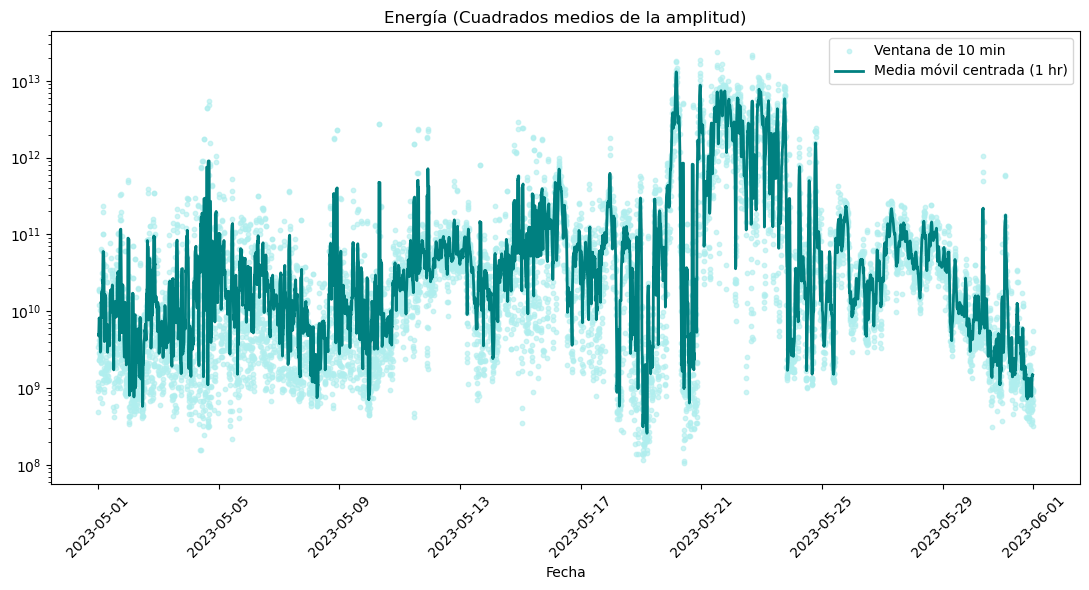

In [12]:
fig1, ax1 = plt.subplots(figsize=(11, 6))
# Energy
ax1.scatter(features_df['timestamp'], features_df['energy'], color='paleturquoise', s=10, alpha=0.6, label="Ventana de 10 min")
# Moving average
ax1.plot(features_df['timestamp'], features_df['energy_movil_media'], color='teal', linewidth=2, label='Media móvil centrada (1 hr)')
ax1.set_yscale('log')
ax1.set_title('Energía (Cuadrados medios de la amplitud)')
ax1.set_xlabel('Fecha')
ax1.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
#fig1.savefig(r"C:\Users\javie\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\MaestriaEnCienciaDeDatos\EstanciaDeInvestigacion\Popocatepelt\PopocatepetlVolcano\img\ReporteEstancia\Energy_may.pdf", bbox_inches="tight", dpi=300)
#plt.close(fig1)

## Kurtosis

In [13]:
# Calculate moving average for kurtosis feature
features_df['kurtosis_movil_media'] = features_df['kurtosis'].rolling(window=12, center=True).mean()

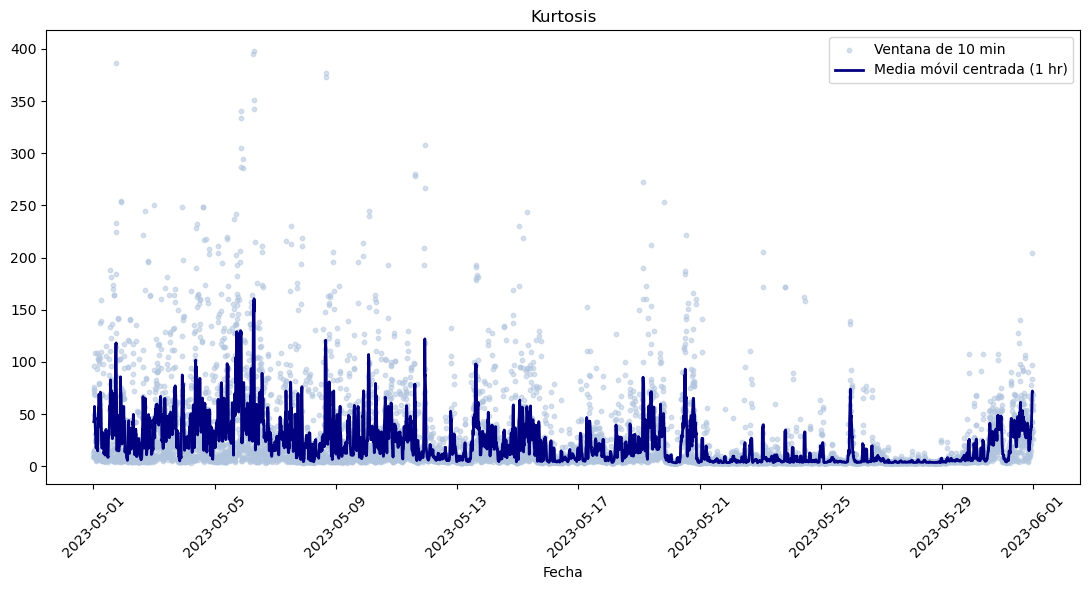

In [14]:
fig2, ax2 = plt.subplots(figsize=(11, 6))
# Kurtosis
ax2.scatter(features_df['timestamp'], features_df['kurtosis'], color='lightsteelblue', s=10, alpha=0.5, label = "Ventana de 10 min")
# Moving average
ax2.plot(features_df['timestamp'], features_df['kurtosis_movil_media'], color='navy', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
ax2.set_title('Kurtosis')
ax2.set_xlabel('Fecha')
ax2.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
# fig2.savefig(r"C:/Users/LENOVO/OneDrive/Documentos/Estancia de Investigación/PopocatepetlVolcano/img/Kurtosis_may_media.pdf", bbox_inches="tight", dpi=300)
# plt.close(fig2)


## Frequency Index

In [16]:
# Calculate moving average for frequency index feature
features_df['frequency_index_movil_media'] = features_df['frequency_index'].rolling(window=12, center=True).mean()

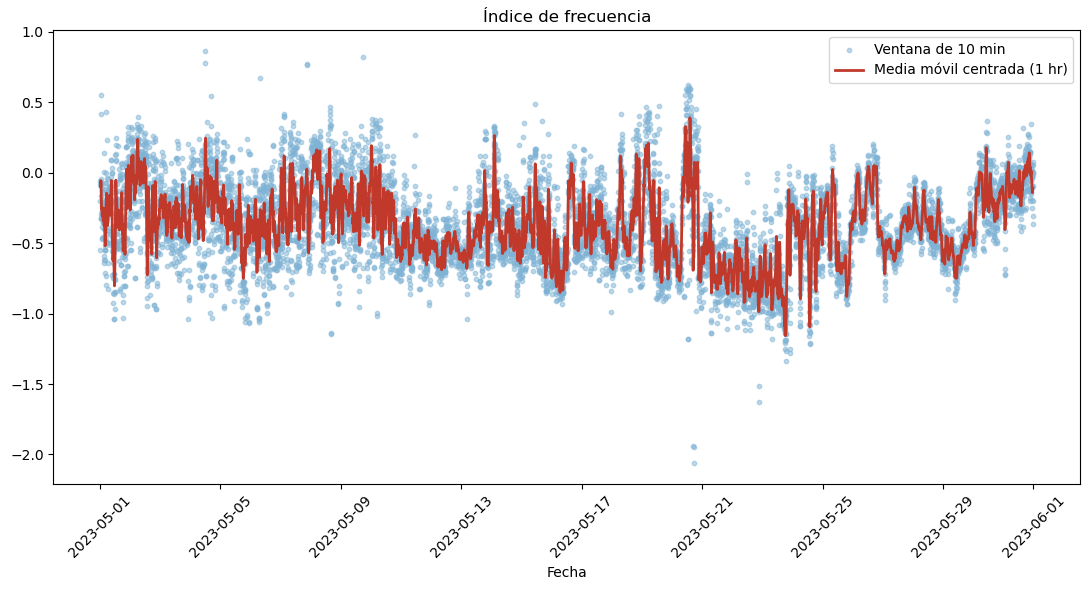

In [17]:
fig3, ax3 = plt.subplots(figsize=(11, 6))
# Frequency Index
ax3.scatter(features_df['timestamp'], features_df['frequency_index'], color='#7FB3D5', s=10, alpha=0.5, label = "Ventana de 10 min")
# Moving average
ax3.plot(features_df['timestamp'], features_df['frequency_index_movil_media'], color='#C0392B', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
ax3.set_title('Índice de frecuencia')
ax3.set_xlabel('Fecha')
ax3.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
# fig3.savefig(r"C:/Users/LENOVO/OneDrive/Documentos/Estancia de Investigación/PopocatepetlVolcano/img/Frequency_index_may_media.pdf", bbox_inches="tight", dpi=300)
# plt.close(fig3)

## Entropy

In [ ]:
# Calculate moving average for entropy feature
features_df['entropy_movil_media'] = features_df['entropy'].rolling(window=12, center=True).mean()

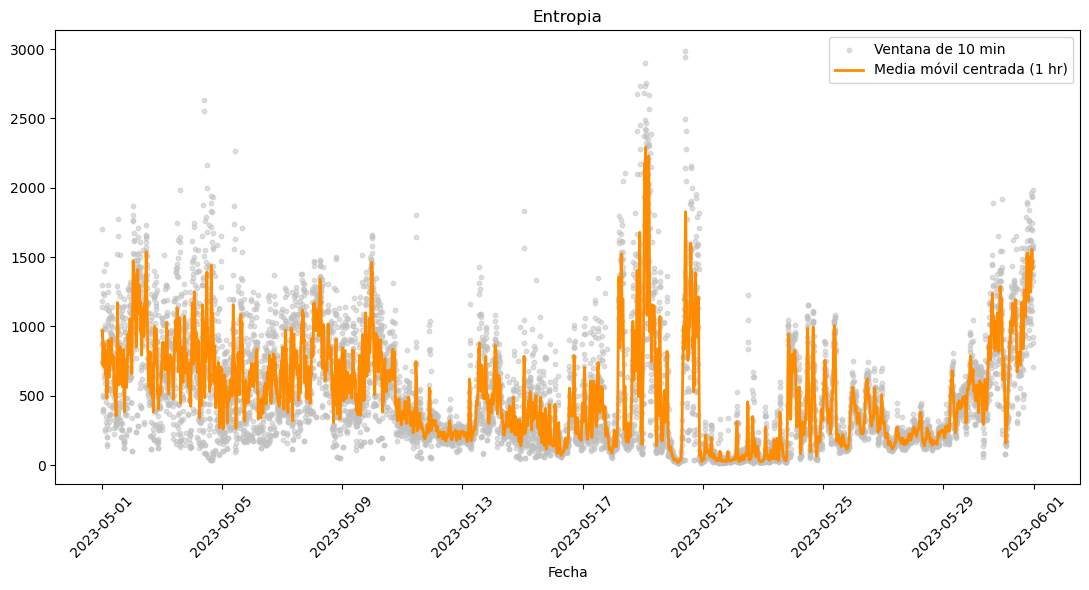

In [19]:
fig4, ax4 = plt.subplots(figsize=(11, 6))
# Entropy
ax4.scatter(features_df['timestamp'], features_df['entropy'], color='silver', s=10, alpha=0.5, label = "Ventana de 10 min")
# Moving average
ax4.plot(features_df['timestamp'], features_df['entropy_movil_media'], color='darkorange', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
ax4.set_title('Entropia')
ax4.set_xlabel('Fecha')
ax4.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
# fig4.savefig(r"C:/Users/LENOVO/OneDrive/Documentos/Estancia de Investigación/PopocatepetlVolcano/img/Entropy_may_media.pdf", bbox_inches="tight", dpi=300)
# plt.close(fig4)

## Joint plot features for 2022

In [ ]:
# Path to the directory containing the data files
source_path = "D:/Popocatepetl/processed_data/2022"
paths = os.listdir(source_path)

# Filter files for a specific month
month = ''
with_s = [x for x in paths if re.match(r'^{}'.format(month), x)]
with_s.sort()
print(with_s)

# Test the features in the range of 0.7 to 30 Hz
min_freq = 0.7
max_freq = 30
# DataFrame to store all features
features_df = pd.DataFrame(columns=["timestamp", "energy", "kurtosis", "frecuency_index", "entropy"])
# Loop through each file and extract features
for file in with_s:
    print(file)
    [filtered_signal, s_low, s_high] = ft.load_and_preprocess_seismic_data(source_path+"/"+file, freqmin=min_freq, freqmax=max_freq, low_freqmin=1, low_freqmax=4, high_freqmin=4, high_freqmax=9)
    day_df = ft.calculate_features(filtered_signal[0], s_low[0], s_high[0], window_size_seconds=600, overlap=0.5)
    features_df = pd.concat([features_df, day_df], ignore_index=True)

# Calculate moving average for all features
features_df['energy_movil_media'] = features_df['energy'].rolling(window=12, center=True).mean()
features_df['kurtosis_movil_media'] = features_df['kurtosis'].rolling(window=12, center=True).mean()
features_df['frequency_index_movil_media'] = features_df['frequency_index'].rolling(window=12, center=True).mean()
features_df['entropy_movil_media'] = features_df['entropy'].rolling(window=12, center=True).mean()

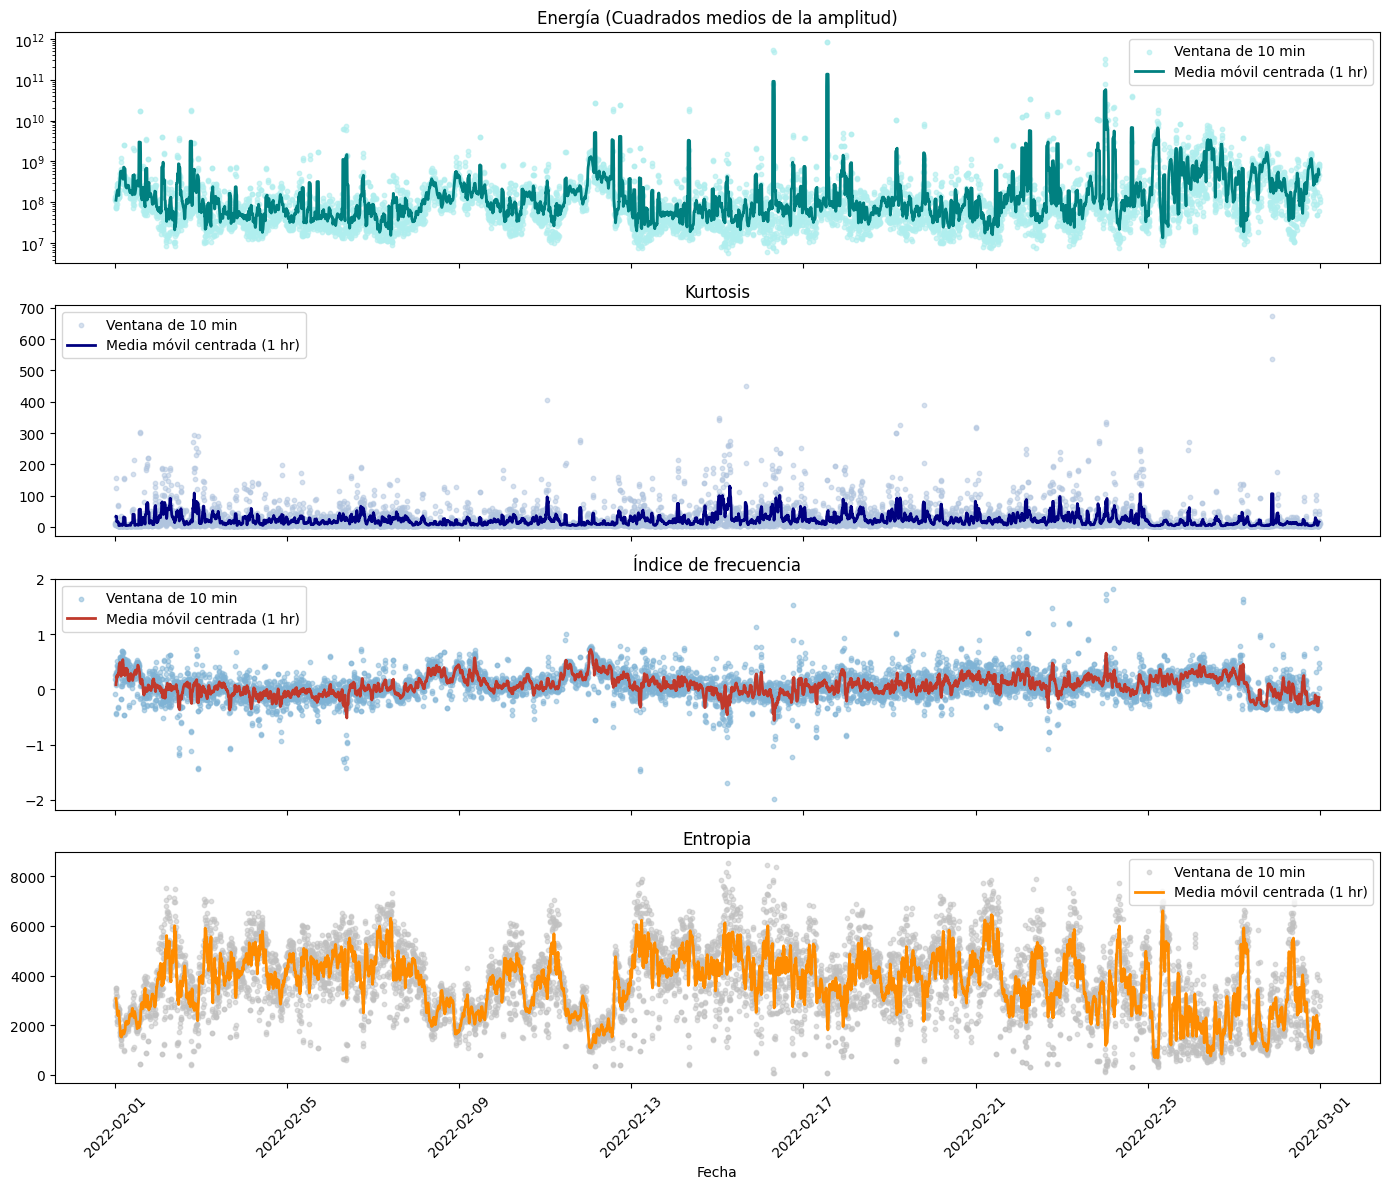

In [70]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 12), sharex=True)
axes[0].scatter(features_df['timestamp'], features_df['energy'], color='paleturquoise', s=10, alpha=0.6, label="Ventana de 10 min")
axes[0].plot(features_df['timestamp'], features_df['energy_movil_media'], color='teal', linewidth=2, label='Media móvil centrada (1 hr)')
axes[0].set_yscale('log')
axes[0].set_title('Energía (Cuadrados medios de la amplitud)')
axes[0].legend(loc='best')

axes[1].scatter(features_df['timestamp'], features_df['kurtosis'], color='lightsteelblue', s=10, alpha=0.5, label = "Ventana de 10 min")
axes[1].plot(features_df['timestamp'], features_df['kurtosis_movil_media'], color='navy', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
axes[1].set_title('Kurtosis')
axes[1].legend(loc='best')

axes[2].scatter(features_df['timestamp'], features_df['frequency_index'], color='#7FB3D5', s=10, alpha=0.5, label = "Ventana de 10 min")
axes[2].plot(features_df['timestamp'], features_df['frequency_index_movil_media'], color='#C0392B', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
axes[2].set_title('Índice de frecuencia')
axes[2].legend(loc='best')

axes[3].scatter(features_df['timestamp'], features_df['entropy'], color='silver', s=10, alpha=0.5, label = "Ventana de 10 min")
axes[3].plot(features_df['timestamp'], features_df['entropy_movil_media'], color='darkorange', alpha = 1,linewidth=2, label='Media móvil centrada (1 hr)')
axes[3].set_title('Entropia')
axes[3].set_xlabel('Fecha')
axes[3].legend(loc='best')

plt.xticks(rotation=45)
plt.tight_layout()